In [1]:
import numpy as np
import pandas as pd
import os
import math
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-12-04 18:38:04.639188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 18:38:05.272599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-04 18:38:05.272643: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### EDA

In [4]:
data.gender.value_counts(dropna=False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:>

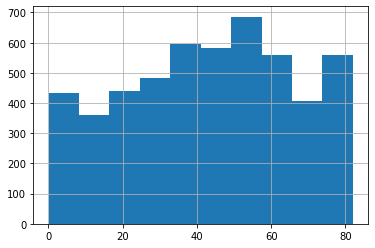

In [5]:
data.age.hist()

In [6]:
data.hypertension.value_counts(dropna=False)

0    4612
1     498
Name: hypertension, dtype: int64

In [7]:
data.heart_disease.value_counts(dropna=False)

0    4834
1     276
Name: heart_disease, dtype: int64

In [8]:
data.ever_married.value_counts(dropna=False)

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [9]:
data.work_type.value_counts(dropna=False)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [10]:
data.Residence_type.value_counts(dropna=False)

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:>

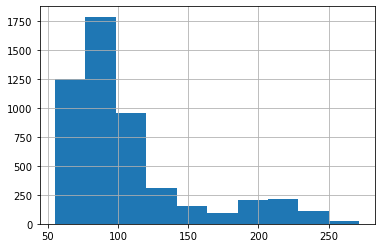

In [11]:
data.avg_glucose_level.hist()

<AxesSubplot:>

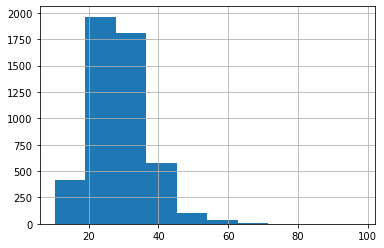

In [12]:
data.bmi.hist()

In [13]:
data.smoking_status.value_counts(dropna=False)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [14]:
data.stroke.value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

### Data Preprocessing

In [15]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
numeric_features = ["age", "avg_glucose_level", "bmi"]

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),  
           ("scaler", StandardScaler())] #z-score
)

categorical_features = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


### PCA

In [17]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [18]:
cat_col_df = data[categorical_features]

In [19]:
one_hot_encoder.fit(cat_col_df)

OneHotEncoder(handle_unknown='ignore')

In [20]:
one_hot_encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array([0, 1]),
 array([0, 1]),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [21]:
one_hot_df = pd.DataFrame(one_hot_encoder.transform(data[categorical_features]).toarray())

In [22]:
one_hot_df.shape

(5110, 20)

In [23]:
one_hot_df.columns=['Female', 'Male', 'Other', 'hypertension_0', 'hypertension_1', 'heart_disease_0', 'heart_disease_1', 'not_married', 'married', 'Govt_job',
                  'Never_worked', 'Private', 'Self-employed', 'children', 'Rural', 'Urban', 'Unknown', 'formerly_smoked', 'never_smoked', 'smokes']

In [24]:
one_hot_df

,Female,Male,Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,not_married,married,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly_smoked,never_smoked,smokes
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
num_col_df = data[numeric_features]

In [26]:
num_col_df

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


In [27]:
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy="median")
median_imputer.fit(num_col_df)
imputed_df = pd.DataFrame(median_imputer.transform(num_col_df))
scaler.fit(imputed_df)
scaler_df = pd.DataFrame(scaler.transform(imputed_df))

In [28]:
scaler_df.columns = ['age_std', 'avg_glucose_level_std', 'bmi_std']

In [29]:
full_data = one_hot_df.merge(scaler_df, left_index=True, right_index=True)

### Over Sampling

In [31]:
X, y = full_data, data.iloc[:, -1]
sm = SMOTE(random_state=42)
X_sampled, y_sampled = sm.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f528d0b1e50>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [32]:
pca = PCA()
X_pca = pca.fit_transform(X_sampled)
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X_pca.shape[1] - n_over_95 + 1

In [33]:
print("Number features: {0}, Total Variance Explained: {1}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 11, Total Variance Explained: 0.9528945992591318


In [34]:
X_pca = X_sampled

In [35]:
y_pca = y_sampled

In [36]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=0)

In [37]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=n_to_reach_95)),
                 ('clf', RandomForestClassifier())])

pipe.fit(X_train_pca,y_train_pca)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('clf', RandomForestClassifier())])

In [41]:
print("model score: %.3f" % pipe.score(X_test_pca,y_test_pca))

model score: 0.936


## Logistic Regression (baseline)

### Without PCA

In [42]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())]
)

In [43]:
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1'], 
            columns=['Pred 0', 'Pred 1'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

In [46]:
ls = LogisticRegression()
ls.fit(X_train, y_train)
print("model score: %.3f" % ls.score(X_test, y_test))

model score: 0.792


In [48]:
ypred_ls = ls.predict(X_test)
conf_matrix(y_test, ypred_ls)

,Pred 0,Pred 1
True 0,TN = 732 (TNR = 75.23%),FP = 241 (FPR = 24.77%)
True 1,FN = 164 (FNR = 16.87%),TP = 808 (TPR = 83.13%)


In [95]:
importance = pd.Series(ls.coef_[0]) # get importance
feature_names = pd.Series(X_train.columns)
ls_features = pd.concat([feature_names, importance], axis=1)
ls_features.columns = ['feature', 'importance']
ls_features = ls_features.sort_values(by='importance')
ls_features

,feature,importance
9,Govt_job,-0.457871
12,Self-employed,-0.387593
18,never_smoked,-0.319598
10,Never_worked,-0.239160
3,hypertension_0,-0.149073
2,Other,-0.085700
14,Rural,-0.067805
6,heart_disease_1,-0.023704
8,married,-0.005311
7,not_married,0.000955


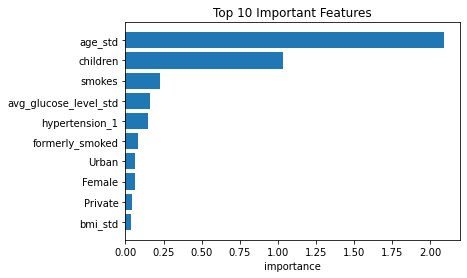

In [100]:
plt.barh(ls_features[-10:].feature, ls_features[-10:].importance)
plt.xlabel('importance')
plt.title('Top 10 Important Features')
plt.show()

### With PCA

In [55]:
clf = Pipeline(
    steps=[('pca', PCA(n_components=n_to_reach_95)),
           ("classifier", LogisticRegression())]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.789


## Random Forest

### Without PCA

In [59]:
rf = RandomForestClassifier(random_state=0)

In [60]:
rf.fit(X_train, y_train)
print("model score: %.3f" % rf.score(X_test, y_test))
ypred_rf = rf.predict(X_test)

model score: 0.963


In [62]:
conf_matrix(y_test,ypred_rf)

,Pred 0,Pred 1
True 0,TN = 933 (TNR = 95.89%),FP = 40 (FPR = 4.11%)
True 1,FN = 32 (FNR = 3.29%),TP = 940 (TPR = 96.71%)


In [103]:
importance1 = pd.Series(rf.feature_importances_) # get importance
rf_features = pd.concat([feature_names, importance1], axis=1)
rf_features.columns = ['feature', 'importance']
rf_features = rf_features.sort_values(by='importance')
rf_features

,feature,importance
2,Other,3.470450e-07
10,Never_worked,1.635969e-05
13,children,1.035131e-02
6,heart_disease_1,1.482638e-02
5,heart_disease_0,1.738373e-02
1,Male,1.914904e-02
0,Female,1.949243e-02
19,smokes,2.053458e-02
15,Urban,2.082413e-02
9,Govt_job,2.100183e-02


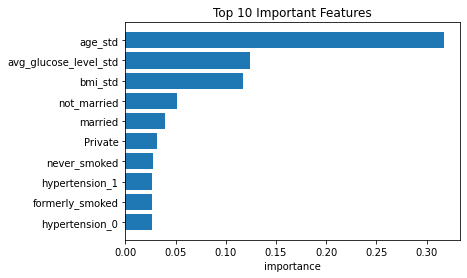

In [104]:
plt.barh(rf_features[-10:].feature, rf_features[-10:].importance)
plt.xlabel('importance')
plt.title('Top 10 Important Features')
plt.show()

### With PCA

In [63]:
rf_pca = Pipeline(
    steps=[('pca', PCA(n_components=n_to_reach_95)),
           ("rf", RandomForestClassifier(random_state=0))]
)

rf_pca.fit(X_train, y_train)
print("model score: %.3f" % rf_pca.score(X_test, y_test))

model score: 0.938


## ANN

### Without PCA

In [135]:
X1 = np.asarray(X_sampled).astype(np.float32)
y1 = np.asarray(y_sampled).astype(np.float32)

In [136]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [138]:
model=keras.Sequential([
    keras.layers.Dense(200,input_shape=[23], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(400, input_shape=[40], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
log = model.fit(X_train2, y_train2, epochs=40, batch_size=4)

Epoch 1/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.4505 - accuracy: 0.7908
Epoch 2/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.3902 - accuracy: 0.8244
Epoch 3/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8574
Epoch 4/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.8697
Epoch 5/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2776 - accuracy: 0.8854
Epoch 6/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2590 - accuracy: 0.8921
Epoch 7/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2409 - accuracy: 0.8974
Epoch 8/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2309 - accuracy: 0.9063
Epoch 9/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2228 - accuracy: 0.9086
Epoch 10/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.209

In [139]:
ypred_ann=model.predict(X_test2).flatten()
ypred_ann = np.round(ypred_ann)

61/61 [==============================] - 0s 2ms/step


In [140]:
conf_matrix(y_test2, ypred_ann)

,Pred 0,Pred 1
True 0,TN = 888 (TNR = 91.26%),FP = 85 (FPR = 8.74%)
True 1,FN = 5 (FNR = 0.51%),TP = 967 (TPR = 99.49%)


In [141]:
(y_test2 == ypred_ann).mean()

0.9537275064267352

### With PCA

In [142]:
X_pca = PCA(n_components=n_to_reach_95).fit_transform(X_sampled)

In [143]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y1, test_size=0.2, random_state=0)

In [144]:
model_pca=keras.Sequential([
    keras.layers.Dense(200,input_shape=[11], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(400, input_shape=[40], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
model_pca.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
log2 = model_pca.fit(X_train3, y_train3, epochs=40, batch_size=4)

Epoch 1/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.4485 - accuracy: 0.7931
Epoch 2/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.3866 - accuracy: 0.8301
Epoch 3/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.3445 - accuracy: 0.8514
Epoch 4/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8695
Epoch 5/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2841 - accuracy: 0.8814
Epoch 6/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2624 - accuracy: 0.8926
Epoch 7/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.8980
Epoch 8/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9018
Epoch 9/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.2289 - accuracy: 0.9113
Epoch 10/40
1945/1945 [==============================] - 4s 2ms/step - loss: 0.219

In [145]:
ypred_ann_pca=model_pca.predict(X_test3).flatten()
ypred_ann_pca = np.round(ypred_ann_pca)
(y_test3 == ypred_ann_pca).mean()

61/61 [==============================] - 0s 1ms/step


0.9465295629820052

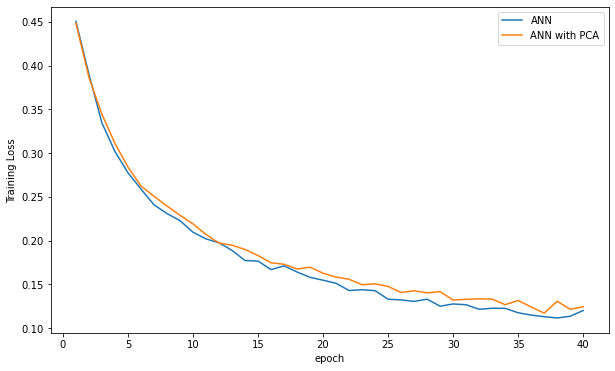

In [153]:
loss = log.history['loss']
loss2 = log2.history['loss']
n_epoch = range(1,41)

plt.figure(figsize=(10,6))
plt.plot(n_epoch, loss, label='ANN')
plt.plot(n_epoch, loss2, label='ANN with PCA')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Training Loss')
plt.show()

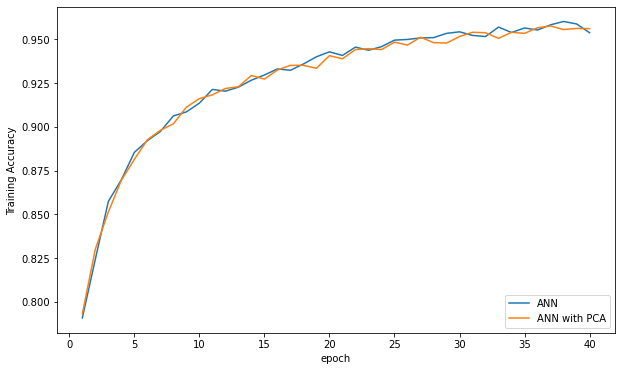

In [155]:
acc = log.history['accuracy']
acc2 = log2.history['accuracy']
n_epoch = range(1,41)

plt.figure(figsize=(10,6))
plt.plot(n_epoch, acc, label='ANN')
plt.plot(n_epoch, acc2, label='ANN with PCA')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('Training Accuracy')
plt.show()